# Section: Importing modules

In [110]:
import operator
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import IPython.core.display as di
from include.config import CleaningConfig, PlottingConfig, NotebookConfig
from include.counting import get_count, get_percentage
from include.plotting import get_plot, display_side_by_side
from include.likertScalePlot import likert_scale
from include.textCleaning import wordcloud

In [2]:
#get_ipython().magic('matplotlib inline')  # Activate that line to use in Jupyter 
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000) 

This text is used to hide the code cell when exported in html

In [4]:
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# Load dataset
To find the total number of participants, we took all submissions and then removed those from people who were outside the country (see question 1) and those from people who had not completed the first ten questions (i.e. those people who did not complete the first page of the survey).

In [5]:
df =  pd.read_csv('./2016/uk/data/cleaned_data.csv')

In [6]:
print('The total number of particants in this study: {}'.format(len(df)))

The total number of particants in this study: 273


# Section 1. Social demographics
In this section, we determine some information about the demographics of the respondents: language, country of work, gender, salary, educational level, age.

## Country of work
The data was cleaned to remove all participants that were not working in United Kingdom


In [11]:
v_to_count, filename  = get_count(df, ['socio1. In which country do you work?'], "one choice", "./../survey_creation/2016/uk/listAnswers/countries.csv", "False", "./2016/uk/output/")

In [12]:
perc_to_count = get_percentage(v_to_count, filename)

In [13]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
In which country do you work?,,
United Kingdom,273,100.0


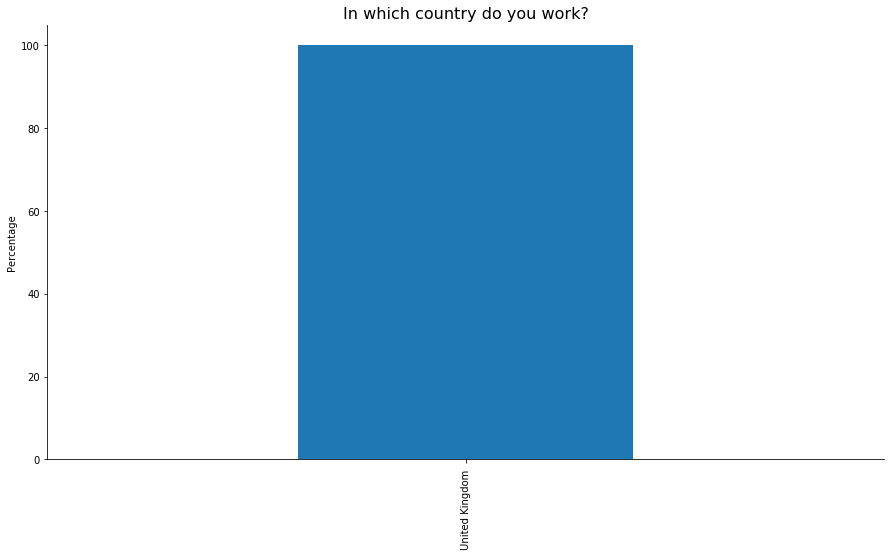

In [14]:
_ = get_plot(perc_to_count, "one choice")

## Gender
Their is a clear gender imbalance in the RSE community in United Kingdom. It is predominately *male* (88%). Only 11% of the participants describe their gender as *female*.

### Please select your gender

In [15]:
v_to_count, filename  = get_count(df, ['socio2. Please select your gender'], "one choice", "./../survey_creation/2016/uk/listAnswers/gender.csv", "False", "./2016/uk/output/")

In [16]:
perc_to_count = get_percentage(v_to_count, filename)

In [17]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Please select your gender,,
Male,232,88.0
Female,30,11.0
Other,1,0.0
NaN,10,NaN


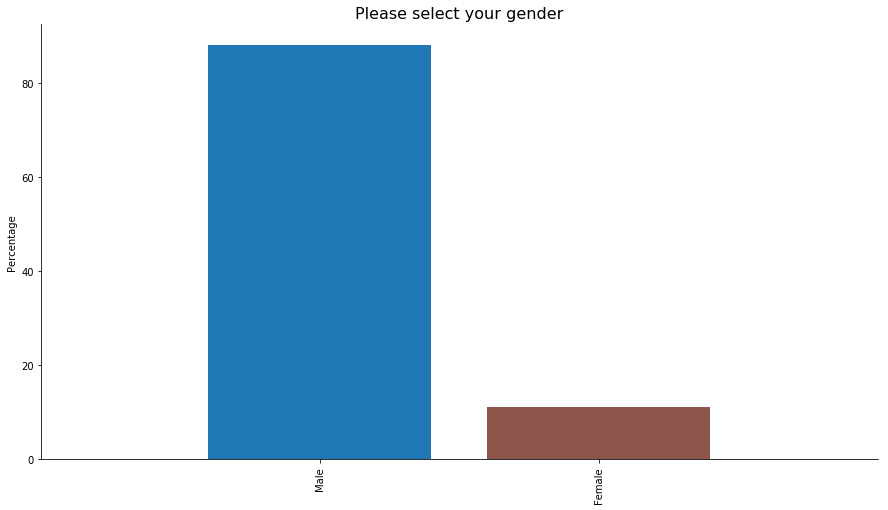

In [18]:
_ = get_plot(perc_to_count, "one choice")

## Age
The majority of RSEs fall within the *35 to 44 years* (40%), and the next more important age range is *25 to 34 years* (36%). The representation of older or younger range is marginal compared to these two groups, The *18 to 24 years* represents only 1%, the *45 to 54 years* only 19% and the *55 to 64 years* 4%.

### Please select your age

In [19]:
v_to_count, filename  = get_count(df, ['socio3. Please select your age'], "one choice", "./../survey_creation/2016/uk/listAnswers/age.csv", "True", "./2016/uk/output/")

In [20]:
perc_to_count = get_percentage(v_to_count, filename)

In [21]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Please select your age,,
18 to 24 years,4,1.0
25 to 34 years,97,36.0
35 to 44 years,107,40.0
45 to 54 years,51,19.0
55 to 64 years,11,4.0
NaN,3,NaN


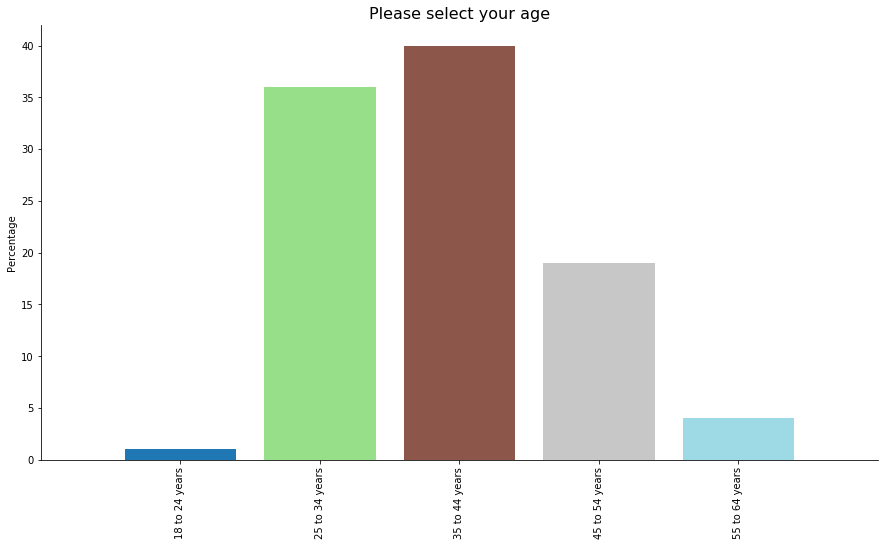

In [22]:
_ = get_plot(perc_to_count, "one choice")

## Salary

Salaries are concentred in two differents range, *30.000 to 34.999* (30%) and within *£35000 to £39.999* (25%). This is slighlty less than to academic staff, where around a third of academics are paid in range of £32,277-£43,325 and a third in the range of £43,325-£58,172 (see [HESA](https://www.hesa.ac.uk/data-and-analysis/publications/staff-2015-16/introduction)).

### Please select the range of your salary

In [23]:
v_to_count, filename  = get_count(df, ['socio4. Please select the range of your salary'], "likert", "./../survey_creation/2016/uk/listAnswers/salary.csv", "True", "./2016/uk/output/")

In [24]:
perc_to_count = get_percentage(v_to_count, filename)

In [25]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Please select the range of your salary,,
Less than £25 000,10.0,4.0
£25 000 to £29 999,21.0,8.0
£30 000 to £34 999,81.0,30.0
£35 000 to £39 999,68.0,25.0
£40 000 to £44 999,38.0,14.0
£45 000 to £50 000,31.0,11.0
£50 000 to £59 999,9.0,3.0
£60 000 to £69 999,3.0,1.0
£70 000 to £99 000,1.0,0.0


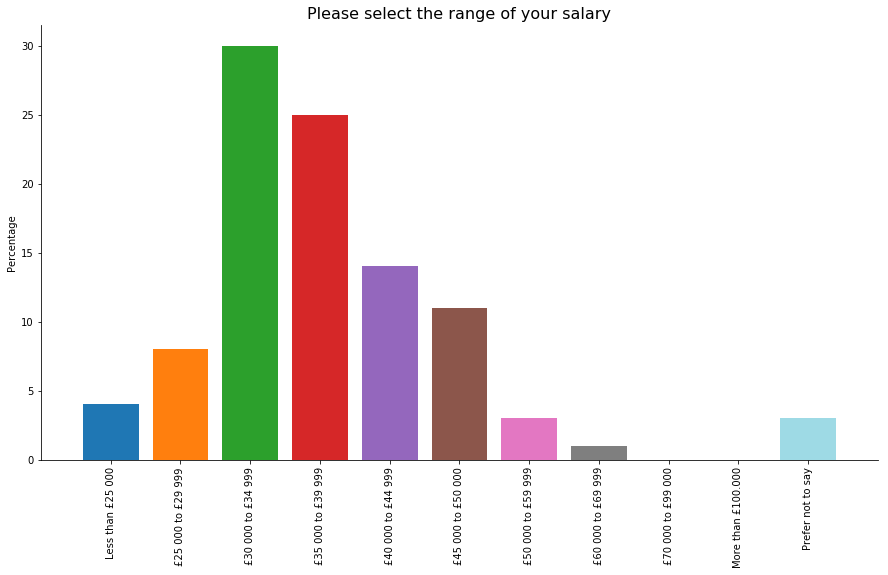

In [26]:
_ = get_plot(perc_to_count, "likert")

## Qualifications
The highest proportion of RSEs hold a *doctorate* (67%) as their highest qualification. The second highest proportion is for the *master degree* (19%), closely followed by *Undergraduate degree* (12%).
Most RSEs derive from a background in *Physical Sciences* (41%). Then the two mains backgrounds are *Computer Science* (23%) and *Biological Sciences* (10%).

### What is the highest qualification you have obtained?

In [43]:
v_to_count, filename  = get_count(df, ['edu1. What is the highest qualification you have obtained?'], "one choice", "./../survey_creation/2016/uk/listAnswers/education.csv", "False", "./2016/uk/output/")

In [44]:
perc_to_count = get_percentage(v_to_count, filename)

In [45]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What is the highest qualification you have obtained?,,
Doctorate,183,67.0
Masters degree,53,19.0
Undergraduate degree,33,12.0
Further Education (NVQ A-Level ...),3,1.0
None,1,0.0


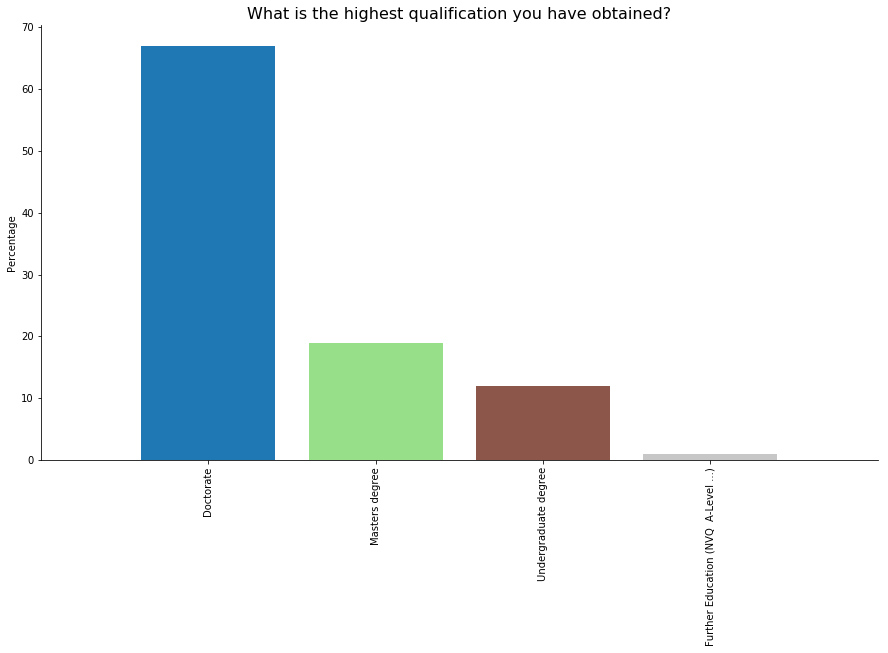

In [46]:
_ = get_plot(perc_to_count, "one choice")

### What was your academic subject?

In [47]:
v_to_count, filename  = get_count(df, ['edu2. What was your academic subject?'], "one choice", "./../survey_creation/2016/uk/listAnswers/academic_field.csv", "False", "./2016/uk/output/")

In [48]:
perc_to_count = get_percentage(v_to_count, filename)

In [49]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What was your academic subject?,,
Physical Sciences,110,41.0
Computer Sciences,61,23.0
Mathematical and Computer Sciences,28,10.0
Engineering,23,9.0
Biological Sciences,19,7.0
Social studies,7,3.0
Combined studies,7,3.0
Other,7,3.0
Subjects allied to Medicine,3,1.0


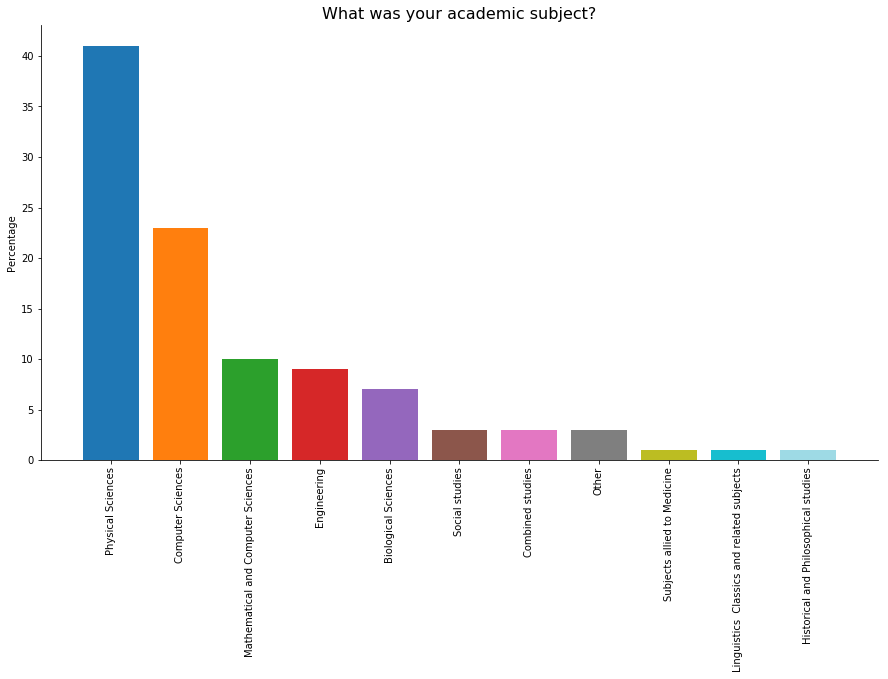

In [50]:
_ = get_plot(perc_to_count, "one choice")

### Enter your academic subject

In [51]:
 wc = wordcloud(df, ['edu3. Enter your academic subject'])

(-0.5, 1499.5, 799.5, -0.5)

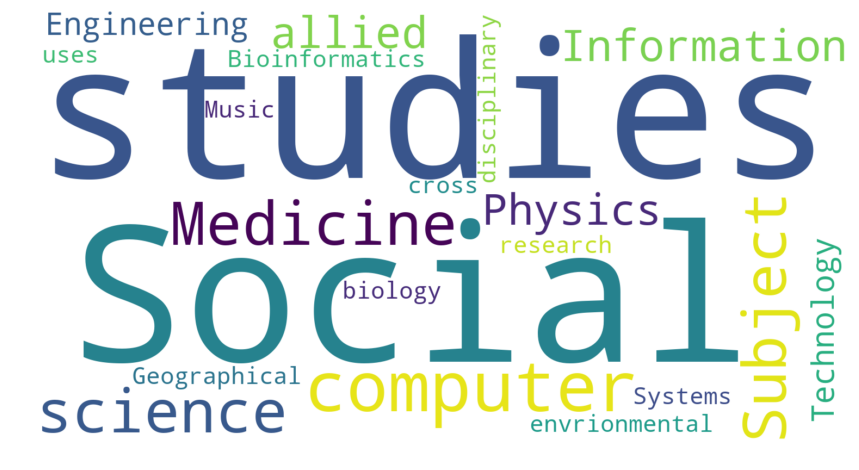

In [52]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

# Section 2: Questions about coding
In this section we investigate the relationship between RSEs and the code they develop.

As expected, the majority of RSEs are primarily employed to develop software (61%) and a vast majority (85%) spend more time developing software than conducting research. They are also the person who "does computers" (61%) in their group.

### Are you employed primarily to develop software for research?; Do you spend more time developing software than conducting research?; Are you employed as a postdoctoral researcher?; Are you the person who "does computers" in your research group?

In [53]:
v_to_count, filename  = get_count(df, ['rse16a. Are you employed primarily to develop software for research?', 'rse16b. Do you spend more time developing software than conducting research?', 'rse16c. Are you employed as a postdoctoral researcher?', 'rse16d. Are you the person who "does computers" in your research group?'], "y/n/na", "./../survey_creation/2016/uk/listAnswers/.csv", "False", "./2016/uk/output/")

In [54]:
perc_to_count = get_percentage(v_to_count, filename)

In [55]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Are you employed as a postdoctoral researcher?,,,,,
Are you employed primarily to develop software for research?,166,104,3,61.0,39.0
Do you spend more time developing software than conducting research?,225,40,8,85.0,15.0
Are you employed as a postdoctoral researcher?,82,181,10,31.0,69.0
"Are you the person who ""does computers"" in your research group?",132,85,56,61.0,39.0


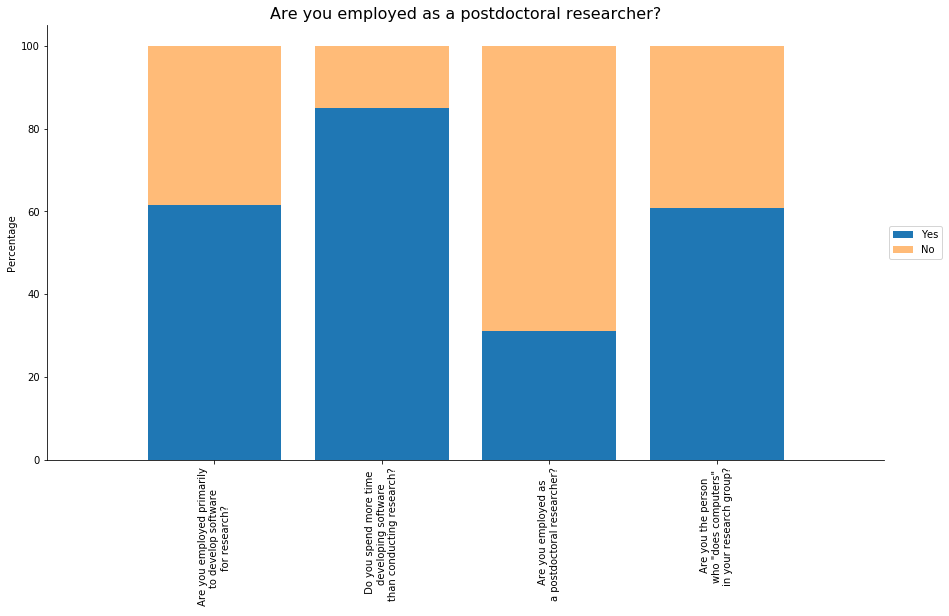

In [56]:
_ = get_plot(perc_to_count, "y/n/na")

### What percentage of your time do you spend developing software each week?

In [127]:
 wc = wordcloud(df, ['currentWork16a. What percentage of your time do you spend developing software each week?'])

(-0.5, 1499.5, 799.5, -0.5)

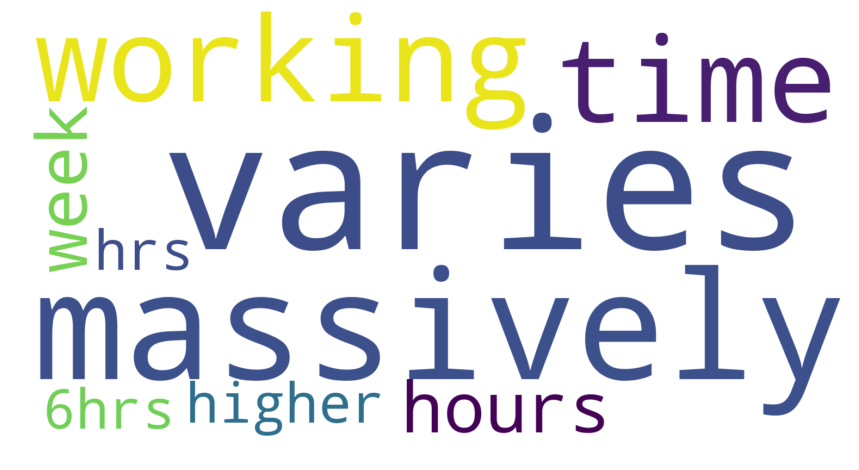

In [128]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

# Section 3. Questions about employment

75% of RSEs work within a university and the participants mainly comes from Oxford. When asked about which job title they have, Research Fellow comes at the top while Research Software Engineer comes second. 
We also wanted to see if the RSEs have a different official job title than the one they actually use. It would have been and indication of a mismatch between their employment term and the actual job (for instance someone hired as postdoc researchers but doing software development). Fortunately it does not to be the case as only 14% of the participants reported such discrepancy. 

### Do you work for a university?

In [61]:
v_to_count, filename  = get_count(df, ['currentEmp1. Do you work for a university?'], "y/n/na", "./../survey_creation/2016/uk/listAnswers/.csv", "False", "./2016/uk/output/")

In [62]:
perc_to_count = get_percentage(v_to_count, filename)

In [63]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Do you work for a university?,,,,,
Do you work for a university?,203,68,2,75.0,25.0


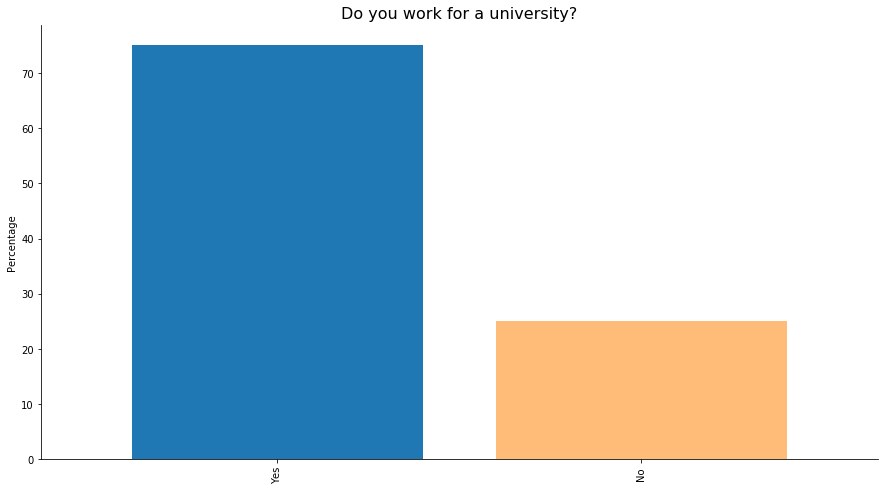

In [65]:
_ = get_plot(perc_to_count, "y/n/na")

### Which university?

In [66]:
v_to_count, filename  = get_count(df, ['currentEmp2. Which university?'], "one choice", "./../survey_creation/2016/uk/listAnswers/universities.csv", "False", "./2016/uk/output/")

In [67]:
perc_to_count = get_percentage(v_to_count, filename)

In [68]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Which university?,,
University of Oxford,50,25.0
Other/Not listed,16,8.0
University of Leeds,13,7.0
University of Manchester,13,7.0
University of Edinburgh,11,6.0
University of Southampton,10,5.0
University of London,10,5.0
University of Reading,10,5.0
University of St Andrews,9,5.0


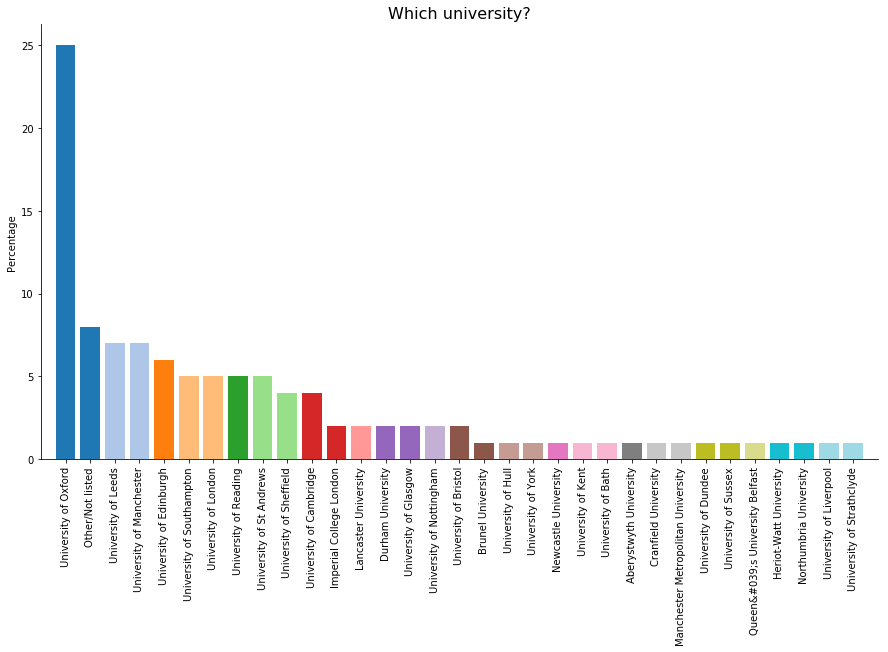

In [69]:
_ = get_plot(perc_to_count, "one choice")

### Which organisation do you work for?

In [70]:
v_to_count, filename  = get_count(df, ['currentEmp4. Which organisation do you work for?'], "one choice", "./../survey_creation/2016/uk/listAnswers/type_organisation.csv", "False", "./2016/uk/output/")

In [71]:
perc_to_count = get_percentage(v_to_count, filename)

In [72]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Which organisation do you work for?,,
University College London,3,19.0
King's College London,3,19.0
UCL,2,12.0
Not saying,1,6.0
"Contract for Collegio Carlo Alberto, Itlay but based in University of Oxford. Previously had a contract with University of Oxford as a post-doc Research Assistant",1,6.0
"Birkbeck, University of London",1,6.0
University of Reading,1,6.0
Queen Mary University London,1,6.0
Univestiry College London,1,6.0


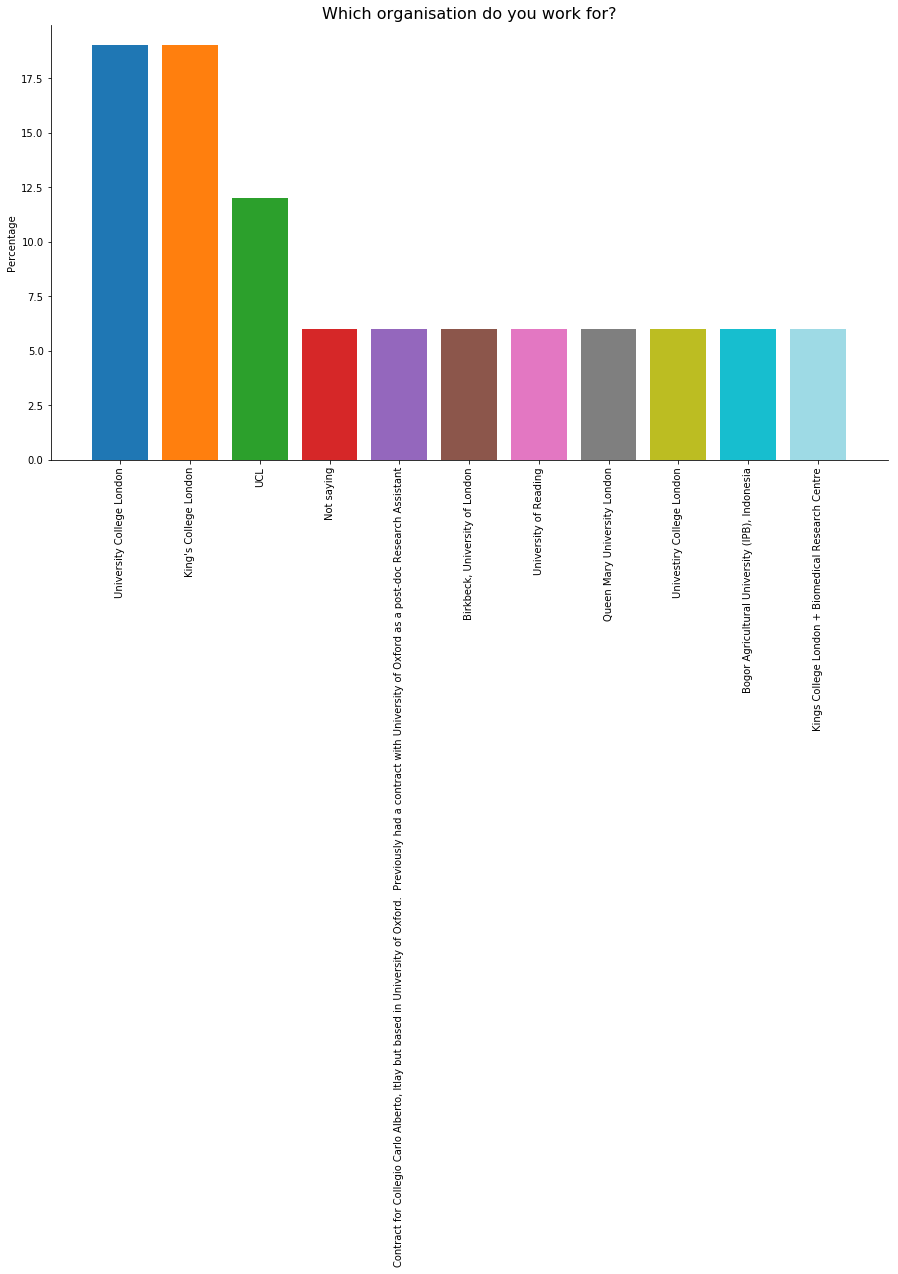

In [73]:
_ = get_plot(perc_to_count, "one choice")

### What is this job title?

In [113]:
data = df['currentEmp5. What is your official job title (i.e. the job title on your contract of employment)?'].dropna()
titles = [z.replace('/', ' ').replace(';', ' ').strip().lower() for z in data]
titles = [ ''.join(i for i in s if not i.isdigit()).strip() for s in titles if len(s) < 50]
print('There are {} propositions'.format(len(titles)))

There are 264 propositions


In [116]:
results = dict()
for i in titles:
    results[str(i).lower()] = results.get(str(i).lower(), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 4:
        print(k[0].title(), k[1])

Research Fellow 14
Research Software Engineer 11
Lecturer 10
Research Associate 10
Scientific Software Engineer 9
Computational Scientist 8
Senior Scientific Software Engineer 7
Software Engineer 6
Senior Research Associate 6
Research Assistant 4
Research Engineer 4
Scientific Software Developer 3
Senior Software Engineer 3
Senior Research Fellow 3
Post-Doctoral Research Associate 3
Postdoctoral Research Assistant 3
Applications Consultant 3
Senior Scientist 3
Scientist 3
Postdoctoral Researcher 3
Software Developer 3
Software Support 2
Postdoctoral Research Associate 2
Web Developer 2
Epsrc Research Software Engineering Fellow 2
Computer Officer 2
Principal Scientific Software Engineer 2
Project Manager 2
Scientific Systems Manager 2
It Manager 2
Developer 2
Research Scientist 2
Professor 2
Post Doctoral Research Associate 2
Researcher 2
Programmer 2
Postgraduate Research Student 1
Support Specialist 1
Epsrc Rse Fellow 1
Web Service Developer 1
Robotic Screening And Instrumentation Sp

In [104]:
 wc = wordcloud(df, ['currentEmp5. What is your official job title (i.e. the job title on your contract of employment)?', 'currentEmp5. What is this job title?'])

(-0.5, 1499.5, 799.5, -0.5)

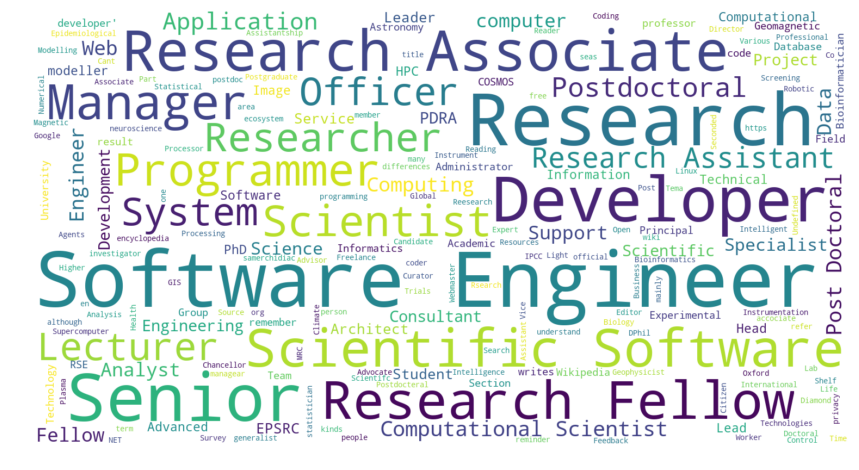

In [105]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### Are you known in your group by a different job title (e.g. the job title on your group website or business cards)?

In [98]:
v_to_count, filename  = get_count(df, ['currentEmp6. Are you known in your group by a different job title (e.g. the job title on your group website or business cards)?'], "y/n/na", "./../survey_creation/2016/uk/listAnswers/.csv", "False", "./2016/uk/output/")

In [99]:
perc_to_count = get_percentage(v_to_count, filename)

In [100]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Are you known in your group by a different job title (e,,,,,
Are you known in your group by a different job title (e,37,235,1,14.0,86.0


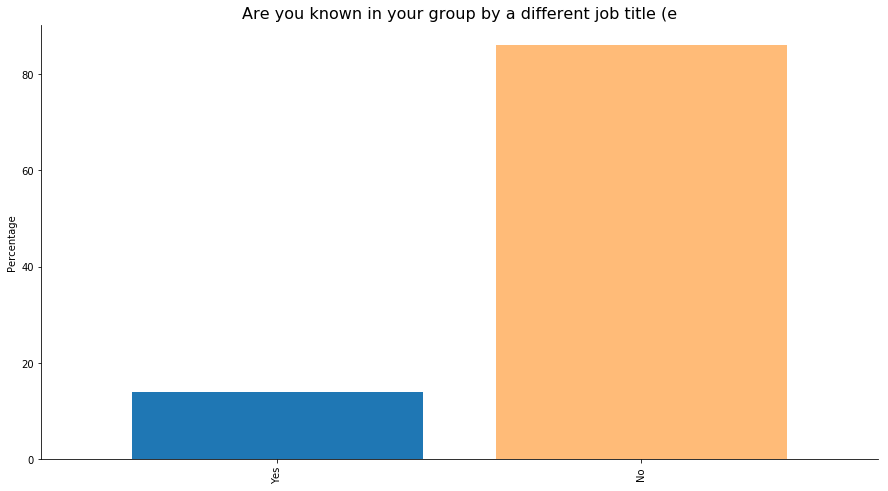

In [101]:
_ = get_plot(perc_to_count, "y/n/na")

# Section 4. Questions about the type of contract

The type of contracts and the fundings are important to understand the situation of RSEs and see if they have stable position in academia.
A vast majority of participants have a full time job (95%) but it is often a fixed term position (34% as long as funding is available and 26% are funded by the Institution core funding). 27% of them do have a permanent position (the other types of contract are marginals). The average length of contract duration is more or less 5 years for the participants that does not have a permanent position.

For the source of funding, 61% of the participants know the origin of them. Almost the half of the projects for which the participants work are funded by Federal and state governments (42%), the German Research Foundation (DFG) (34%), and by the European Union 10%. 5% of the participants claims they volunteer their time for working on the largest project.

A question also asked about the funding about their effort as an RSE/equivalent. The top four funders remains the same. The Federal and state governments funds is funding 38% of the participants, the German Research Foundation 31% and the European Union 13% and 8% of the participants volunteer their time.

The last question about the funding was about the previous project. This helps to see if the funders changed over the time for the participants. The answer is no, the three mains funders were exactly the same with only a slight variation in percentages, the Federal and state governments funded the project of 43% of the participants, while the German Research Foundation accounted for 31% and European Union for 11%.

It is important to note that these percentages are not mutually exclusives as the participants had the option to choose several sources of funding for each question.


### Do you work full time or part time?

In [129]:
v_to_count, filename  = get_count(df, ['currentEmp12. Do you work full time or part time?'], "one choice", "./../survey_creation/2016/uk/listAnswers/type_hours.csv", "False", "./2016/uk/output/")

In [130]:
perc_to_count = get_percentage(v_to_count, filename)

In [131]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Do you work full time or part time?,,
Full time,258,95.0
Part time,14,5.0
NaN,1,NaN


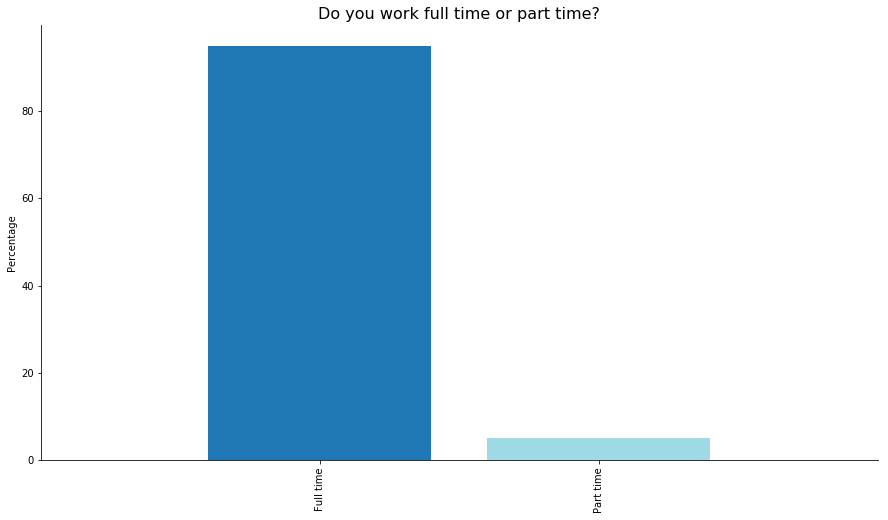

In [132]:
_ = get_plot(perc_to_count, "one choice")

### In what year did you start your current position?

In [74]:
v_to_count, filename  = get_count(df, ['currentEmp16a. In what year did you start your current position?'], "freenumeric", "./../survey_creation/2016/uk/listAnswers/.csv", "False", "./2016/uk/output/")

       currentEmp16a. In what year did you start your current position?
count                                         272.000000               
mean                                         2010.852941               
std                                             5.376633               
min                                          1987.000000               
25%                                          2009.000000               
50%                                          2013.000000               
75%                                          2014.000000               
max                                          2016.000000               


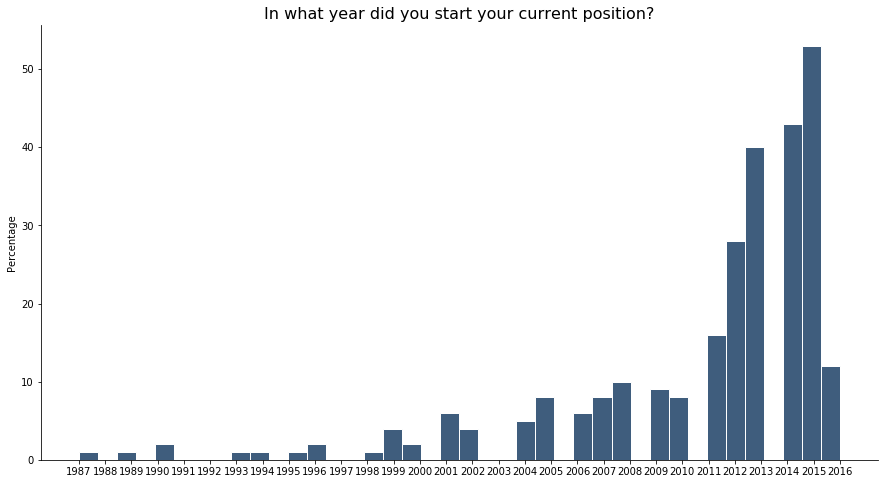

In [75]:
_ = get_plot(v_to_count, "freenumeric")

### What is the duration of your current contract?

In [76]:
v_to_count, filename  = get_count(df, ['currentEmp11. What is the duration of your current contract?'], "freenumeric", "./../survey_creation/2016/uk/listAnswers/.csv", "False", "./2016/uk/output/")

       currentEmp11. What is the duration of your current contract?
count                                         123.000000           
mean                                           28.178862           
std                                            15.718858           
min                                             2.000000           
25%                                            13.000000           
50%                                            24.000000           
75%                                            36.000000           
max                                            96.000000           


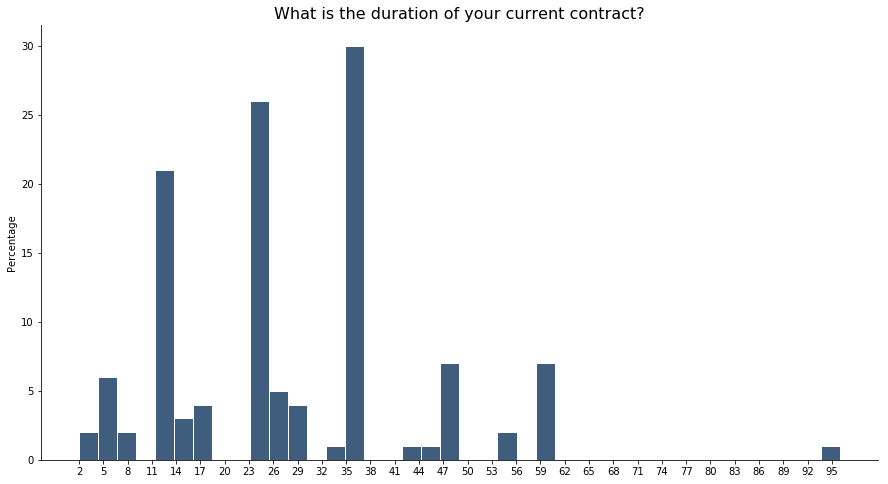

In [77]:
_ = get_plot(v_to_count, "freenumeric")

### Is this your first job?

In [82]:
v_to_count, filename  = get_count(df, ['currentEmp16b. Is this your first job?'], "y/n/na", "./../survey_creation/2016/uk/listAnswers/.csv", "False", "./2016/uk/output/")

In [83]:
perc_to_count = get_percentage(v_to_count, filename)

In [84]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Is this your first job?,,,,,
Is this your first job?,47,225,1,17.0,83.0


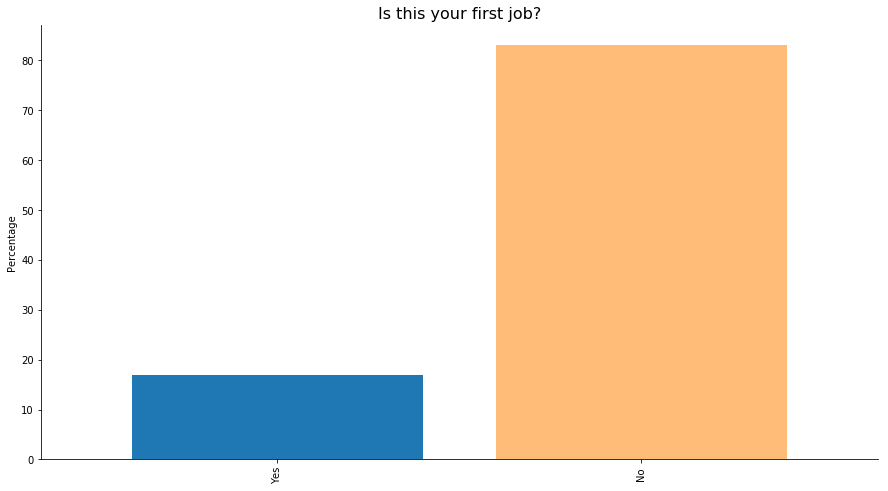

In [85]:
_ = get_plot(perc_to_count, "y/n/na")

# Section 5. Questions about previous employment

To the participants that works in private sector previous to their appointment as RSEs, we asked them the reason why they left the private sector. However, the scale constructed did not catch the reasons properlhy as 68% of the participants choose "Others" as the reason. 



### Why did you leave the private sector?

In [117]:
v_to_count, filename  = get_count(df, ['prevEmp16b. Why did you leave the private sector?'], "one choice", "./../survey_creation/2016/uk/listAnswers/reasons_leave_job.csv", "False", "./2016/uk/output/")

In [118]:
perc_to_count = get_percentage(v_to_count, filename)

In [119]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Why did you leave the private sector?,,
Others,76,68.0
Mismatch between description and promise during the interview and actual job,12,11.0
Lack of opportunity to advance,9,8.0
Loss of faith and confidence in corporate leaders,8,7.0
Excessive overtime hours,5,5.0
A work environment that does not encourage teamwork,1,1.0
NaN,162,NaN


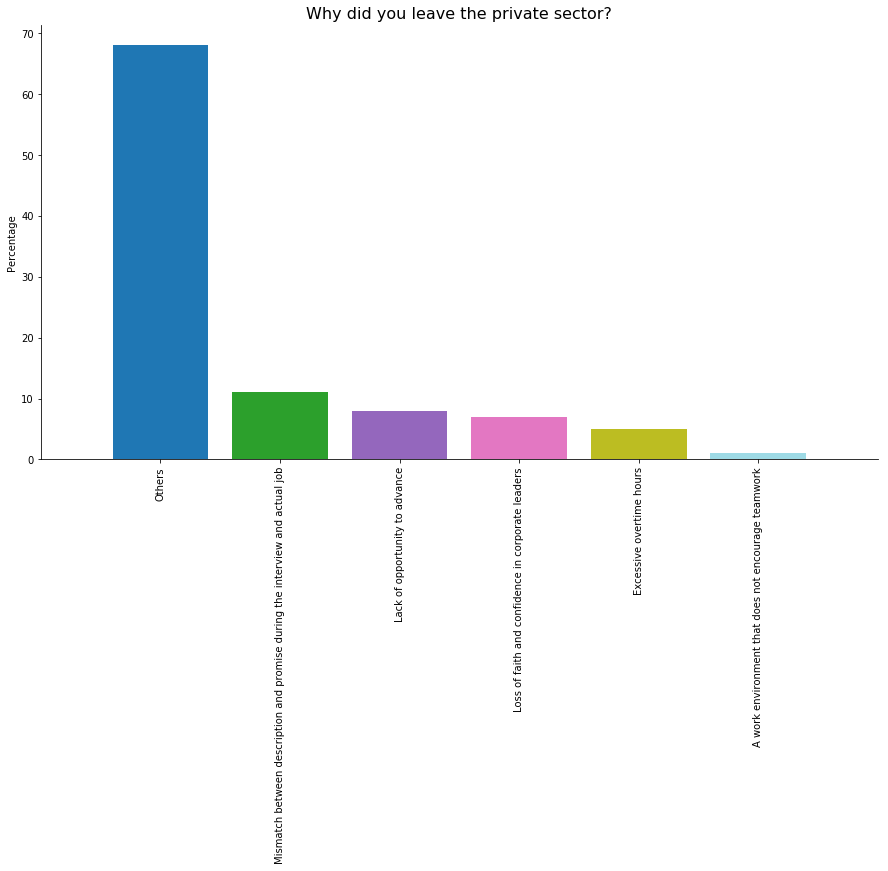

In [120]:
_ = get_plot(perc_to_count, "one choice")

### What was the official job title of your previous job (i.e. the job title stated on your contact of employment)?

In [121]:
 wc = wordcloud(df, ['prevEmp16c. What was the official job title of your previous job (i.e. the job title stated on your contact of employment)?'])

(-0.5, 1499.5, 799.5, -0.5)

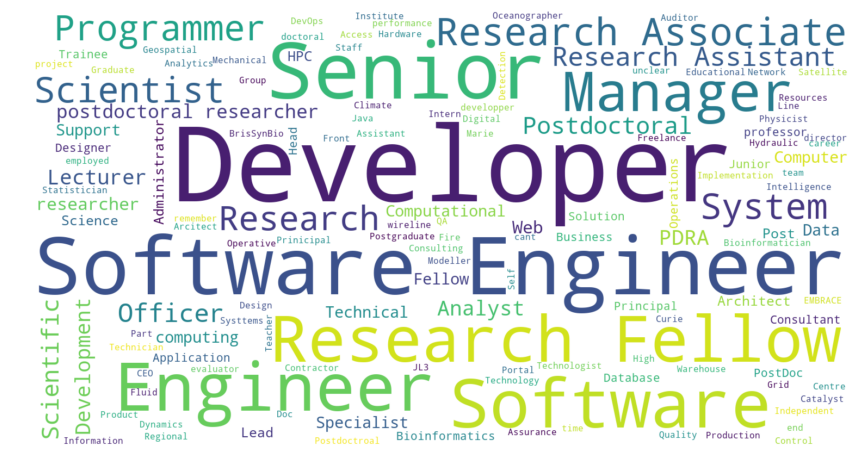

In [122]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### What was the type of your contract?

In [123]:
v_to_count, filename  = get_count(df, ['prevEmp16d. What was the type of your contract?'], "one choice", "./../survey_creation/2016/uk/listAnswers/type_contract.csv", "False", "./2016/uk/output/")

In [124]:
perc_to_count = get_percentage(v_to_count, filename)

In [125]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What was the type of your contract?,,
Permanent,116,52.0
Fixed-term,92,41.0
Freelancer consultant contractors,13,6.0
Zero hour contract,2,1.0
NaN,50,NaN


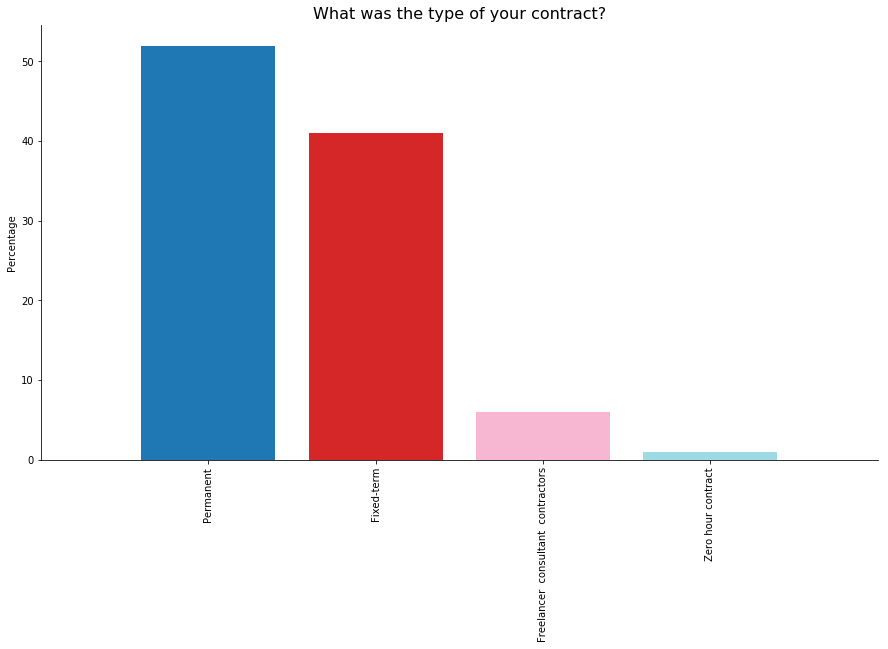

In [126]:
_ = get_plot(perc_to_count, "one choice")

# Section: 3

## Group of question: paper

### Were you acknowledged in the paper?; Were you named as a co-author of the paper?; Were you named as the lead author of the paper?

In [ ]:
v_to_count, filename  = get_count(df, ['paper2. Were you acknowledged in the paper?', 'paper4. Were you named as a co-author of the paper?', 'paper5. Were you named as the lead author of the paper?'], "y/n/na", "./../survey_creation/2016/uk/listAnswers/.csv", "False", "./2016/uk/output/")

In [ ]:
perc_to_count = get_percentage(v_to_count, filename)

In [ ]:
display_side_by_side(v_to_count,perc_to_count)

In [ ]:
_ = get_plot(perc_to_count, "y/n/na")

## Group of question: stability

### What is the bus factor of your most important software project?

In [ ]:
v_to_count, filename  = get_count(df, ['stability1. What is the bus factor of your most important software project?'], "likert", "./../survey_creation/2016/uk/listAnswers/bus_factor.csv", "False", "./2016/uk/output/")

In [ ]:
display(v_to_count) 

In [ ]:
_ = get_plot(v_to_count, "likert")

# Section: 4

## Group of question: perfCheck

### Do you receive sufficient information on the results of your work?; Does your work give you the opportunity to check on how well you are doing your work?

In [ ]:
v_to_count, filename  = get_count(df, ['perfCheck1. Do you receive sufficient information on the results of your work?', 'perfCheck2. Does your work give you the opportunity to check on how well you are doing your work?'], "likert", "./../survey_creation/2016/uk/listAnswers/likert_time_5.csv", "False", "./2016/uk/output/")

In [ ]:
display(v_to_count) 

In [ ]:
_ = get_plot(v_to_count, "likert")

## Group of question: turnOver

### How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?; How often do you look forward to another day at work?

In [ ]:
v_to_count, filename  = get_count(df, ['turnOver1. How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?', 'turnOver2. How often do you look forward to another day at work?'], "likert", "./../survey_creation/2016/uk/listAnswers/likert_time_5.csv", "False", "./2016/uk/output/")

In [ ]:
display(v_to_count) 

In [ ]:
_ = get_plot(v_to_count, "likert")

## Group of question: affRec

### I am satisfied with my supervisor/line manager's confidence in me; I am satisfied with a word of thanks from my supervisor/line manager

In [ ]:
v_to_count, filename  = get_count(df, ["affRec1. I am satisfied with my supervisor/line manager's confidence in me", 'affRec2. I am satisfied with a word of thanks from my supervisor/line manager'], "likert", "./../survey_creation/2016/uk/listAnswers/likert_agree.csv", "False", "./2016/uk/output/")

In [ ]:
display(v_to_count) 

In [ ]:
_ = get_plot(v_to_count, "likert")

## Group of question: percEmp

### It would not be very difficult for me to get an equivalent job in a different organisation; I can think of a number of organisations that would probably offer me a job; My experience is in demand on the labour market

In [ ]:
v_to_count, filename  = get_count(df, ['percEmp1. It would not be very difficult for me to get an equivalent job in a different organisation', 'percEmp2. I can think of a number of organisations that would probably offer me a job', 'percEmp3. My experience is in demand on the labour market'], "likert", "./../survey_creation/2016/uk/listAnswers/likert_agree.csv", "False", "./2016/uk/output/")

In [ ]:
display(v_to_count) 

In [ ]:
_ = get_plot(v_to_count, "likert")

## Group of question: affSat

### I find real enjoyment in my job; Most days I am enthusiastic about my job; I feel fairly well satisfied with my job

In [ ]:
v_to_count, filename  = get_count(df, ['affSat1. I find real enjoyment in my job', 'affSat2. Most days I am enthusiastic about my job', 'affSat3. I feel fairly well satisfied with my job'], "likert", "./../survey_creation/2016/uk/listAnswers/likert_agree.csv", "False", "./2016/uk/output/")

In [ ]:
display(v_to_count) 

In [ ]:
_ = get_plot(v_to_count, "likert")

## Group of question: progRSE

### My current position is an integral part of my career plan; It is likely that my next position will be an RSE role

In [ ]:
v_to_count, filename  = get_count(df, ['progRSE4. My current position is an integral part of my career plan', 'progRSE5. It is likely that my next position will be an RSE role'], "likert", "./../survey_creation/2016/uk/listAnswers/likert_agree.csv", "False", "./2016/uk/output/")

In [ ]:
display(v_to_count) 

In [ ]:
_ = get_plot(v_to_count, "likert")

# Section: 5

## Group of question: perfCheck

### Do you receive sufficient information on the purpose of your work?; Does your work provide you with direct feedback on how well you are doing your work?; Does your supervisor/line manager inform you about how well you are doing your work?; Do your colleagues inform you about how well you are doing your work?

In [ ]:
v_to_count, filename  = get_count(df, ['perfCheck4. Do you receive sufficient information on the purpose of your work?', 'perfCheck5. Does your work provide you with direct feedback on how well you are doing your work?', 'perfCheck6. Does your supervisor/line manager inform you about how well you are doing your work?', 'perfCheck7. Do your colleagues inform you about how well you are doing your work?'], "likert", "./../survey_creation/2016/uk/listAnswers/likert_time_5.csv", "False", "./2016/uk/output/")

In [ ]:
display(v_to_count) 

In [ ]:
_ = get_plot(v_to_count, "likert")

## Group of question: turnOver

### How often do you consider leaving your job?; How often do dream about getting another job that will better suit your needs?

In [ ]:
v_to_count, filename  = get_count(df, ['turnOver3. How often do you consider leaving your job?', 'turnOver4. How often do dream about getting another job that will better suit your needs?'], "likert", "./../survey_creation/2016/uk/listAnswers/likert_time_5.csv", "False", "./2016/uk/output/")

In [ ]:
display(v_to_count) 

In [ ]:
_ = get_plot(v_to_count, "likert")

### My current job satisfies my personal needs; I would accept another job at the same compensation level if I was offered it

In [ ]:
v_to_count, filename  = get_count(df, ['turnOver5. My current job satisfies my personal needs', 'turnOver6. I would accept another job at the same compensation level if I was offered it'], "likert", "./../survey_creation/2016/uk/listAnswers/likert_agree.csv", "False", "./2016/uk/output/")

In [ ]:
display(v_to_count) 

In [ ]:
_ = get_plot(v_to_count, "likert")

## Group of question: affRec

### I am satisfied with the recognition I receive from my supervisor/line manager for doing my job; I am satisfied with the compliments from my supervisor/line manager concerning my work; I am satisfied with the encouragement from my supervisor/line manager while doing my job

In [ ]:
v_to_count, filename  = get_count(df, ['affRec3. I am satisfied with the recognition I receive from my supervisor/line manager for doing my job', 'affRec4. I am satisfied with the compliments from my supervisor/line manager concerning my work', 'affRec5. I am satisfied with the encouragement from my supervisor/line manager while doing my job'], "likert", "./../survey_creation/2016/uk/listAnswers/likert_agree.csv", "False", "./2016/uk/output/")

In [ ]:
display(v_to_count) 

In [ ]:
_ = get_plot(v_to_count, "likert")

## Group of question: affSat

### I like my job better than the average person

In [ ]:
v_to_count, filename  = get_count(df, ['affSat4. I like my job better than the average person'], "likert", "./../survey_creation/2016/uk/listAnswers/likert_agree.csv", "False", "./2016/uk/output/")

In [ ]:
display(v_to_count) 

In [ ]:
_ = get_plot(v_to_count, "likert")

## Group of question: progRSE

### It is likely that I will gain a promotion within my current group; The process I have to complete to gain a promotion is clear and understandable; There are many opportunities within my chosen career plan

In [ ]:
v_to_count, filename  = get_count(df, ['progRSE1. It is likely that I will gain a promotion within my current group', 'progRSE2. The process I have to complete to gain a promotion is clear and understandable', 'progRSE3. There are many opportunities within my chosen career plan'], "likert", "./../survey_creation/2016/uk/listAnswers/likert_agree.csv", "False", "./2016/uk/output/")

In [ ]:
display(v_to_count) 

In [ ]:
_ = get_plot(v_to_count, "likert")

## Group of question: skill

### In your opinion, what are the three most important skills that a Research Software Engineer must possess?

In [ ]:
 wc = wordcloud(df, ['skill2. In your opinion, what are the three most important skills that a Research Software Engineer must possess?'])

In [ ]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### In your opinion, what are the three most important skills that a Research Software Engineer must possess?

In [ ]:
 wc = wordcloud(df, ['skill2-1. In your opinion, what are the three most important skills that a Research Software Engineer must possess?'])

In [ ]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### In your opinion, what are the three most important skills that a Research Software Engineer must possess?

In [ ]:
 wc = wordcloud(df, ['skill2-2. In your opinion, what are the three most important skills that a Research Software Engineer must possess?'])

In [ ]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### Are you a member of the UK RSE Association? (Members are people who have signed up to the UK RSE mailing list)

In [ ]:
v_to_count, filename  = get_count(df, ['ukrse1. Are you a member of the UK RSE Association? (Members are people who have signed up to the UK RSE mailing list)'], "y/n/na", "./../survey_creation/2016/uk/listAnswers/.csv", "False", "./2016/uk/output/")

In [ ]:
perc_to_count = get_percentage(v_to_count, filename)

In [ ]:
display_side_by_side(v_to_count,perc_to_count)

In [ ]:
_ = get_plot(perc_to_count, "y/n/na")

### What is your Operating System of choice for use at work?

In [ ]:
v_to_count, filename  = get_count(df, ['tool2. What is your Operating System of choice for use at work?'], "one choice", "./../survey_creation/2016/uk/listAnswers/os.csv", "False", "./2016/uk/output/")

In [ ]:
perc_to_count = get_percentage(v_to_count, filename)

In [ ]:
display_side_by_side(v_to_count,perc_to_count)

In [ ]:
_ = get_plot(perc_to_count, "one choice")